In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설정된 폰트 목록 출력
sys_font = [f.name for f in fm.fontManager.ttflist]
print(sys_font)

# 나눔고딕 폰트가 목록에 있는지 확인
print('NanumGothic' in sys_font)

['DejaVu Serif Display', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXNonUnicode', 'cmmi10', 'cmtt10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'DejaVu Sans', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Sans Display', 'STIXNonUnicode', 'cmb10', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'STIXGeneral', 'DejaVu Serif', 'cmr10', 'DejaVu Serif', 'STIXGeneral', 'cmsy10', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'DejaVu Serif', 'STIXSizeOneSym', 'STIXGeneral', 'cmex10', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'cmss10', 'DejaVu Sans Mono', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Mono', 'Liberation Serif', 'Liberation Sans Narrow', 'Humor Sans', 'Liberation Sans', 'Liberation Serif', 'Liberation Sans', 'Liberation Sans', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Serif']
False


In [8]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.3 MB/s eta 0:00:00


In [9]:
import koreanize_matplotlib

# 한국어 형태소 분석 및 데이터 시각화

이 노트북은 Bareun API를 사용하여 한국어 텍스트 데이터에서 명사를 추출하고, 다양한 시각화 기법을 통해 분석하는 방법을 설명합니다.

## 주요 기능
1. Bareun API를 사용한 한국어 형태소 분석
2. 뉴스 데이터에서 명사 추출
3. 워드클라우드, 네트워크 분석, 막대 차트를 통한 시각화

In [4]:
# Bareun API 패키지 다운로드
# curl 명령을 사용해 Bareun Linux 패키지를 다운로드
# -L: 리다이렉션을 따름, -J: Content-Disposition 헤더 존재 시 파일명 사용, -k: SSL 인증 검증 무시, -s: 진행 상황 표시 없음
!curl -LJks -H "uname:$(uname -a)" https://bareun.ai/api/get -o bareun-linux.deb

# 현재 디렉토리의 파일 목록 표시
!ls

bareun-linux.deb  sample_data


In [5]:
# 시스템 정보 출력
# uname -a: 운영체제 이름, 호스트명, 커널 버전 등의 시스템 정보 출력
!uname -a

Linux 10b741dca34d 6.1.123+ #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


In [6]:
# 다운로드한 Bareun 패키지 설치
# dpkg -i: 데비안 패키지 설치
!dpkg -i bareun-linux.deb

Selecting previously unselected package bareun.
(Reading database ... 126342 files and directories currently installed.)
Preparing to unpack bareun-linux.deb ...
Unpacking bareun (3.0.rc3) ...
Setting up bareun (3.0.rc3) ...
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down
Configuration file /etc/systemd/system/bareun.service is marked executable. Please remove executable permission bits. Proceeding anyway.
Created symlink /etc/systemd/system/multi-user.target.wants/bareun.service → /etc/systemd/system/bareun.service.


In [10]:
# Bareun 환경 변수 설정
# %env: Jupyter 매직 명령어로 환경 변수 설정
%env BAREUN_ROOT="/opt/bareun"  # Bareun 설치 루트 경로 설정
%env LD_LIBRARY_PATH="/opt/bareun/lib"  # 라이브러리 경로 설정

# Bareun 서비스 백그라운드로 실행
# nohup: 로그아웃 후에도 명령이 계속 실행되도록 함
# &: 명령을 백그라운드로 실행
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" nohup /opt/bareun/bin/bareun&

env: BAREUN_ROOT="/opt/bareun"  # Bareun 설치 루트 경로 설정
env: LD_LIBRARY_PATH="/opt/bareun/lib"  # 라이브러리 경로 설정
nohup: appending output to 'nohup.out'


In [11]:
# Bareun 프로세스 실행 확인
# ps -ef: 모든 프로세스 상세 정보 출력
# grep bareun: bareun 문자열이 포함된 라인만 필터링
!ps -ef | grep bareun

root        4216       1 49 13:34 ?        00:00:00 /opt/bareun/bin/bareun
root        4232    2747  0 13:34 ?        00:00:00 /bin/bash -c ps -ef | grep bareun
root        4234    4232  0 13:34 ?        00:00:00 /bin/bash -c ps -ef | grep bareun


In [19]:
# API 키 등록
# -reg 옵션: API 키 등록
!BAREUN_ROOT="/opt/bareun" LD_LIBRARY_PATH="/opt/bareun/lib" /opt/bareun/bin/bareun -reg koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA

2025-06-20 13:35:40.626787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/bareun/lib
2025-06-20 13:35:40.626872: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Use config file: /opt/bareun/config/bareun.json

------
200 OK
sucessfully registered koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA


In [13]:
# Bareun Python 패키지(bareunpy) 설치 또는 업데이트
# -U: 이미 설치된 패키지를 최신 버전으로 업그레이드
!pip install -U bareunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [17]:
# 필요한 라이브러리 임포트
import sys  # 시스템 관련 함수 및 변수 제공
import google.protobuf.text_format as tf  # 프로토콜 버퍼 텍스트 포맷 처리
from bareunpy import Tagger  # 형태소 분석기
from bareunpy import Tokenizer  # 토크나이저
from collections import defaultdict  # 기본값이 있는 딕셔너리

# Bareun API 초기화
API_KEY="koba-YEVHS7Q-VDSUWIY-XCIS3OQ-LWD7WHA"  # API 키 설정
tagger = Tagger(API_KEY, 'localhost', 5656)  # 형태소 분석기 객체 생성 (localhost:5656 서버에 연결)
tokenizer = Tokenizer(API_KEY, 'localhost', 5656)  # 토크나이저 객체 생성

In [15]:
# pandas 라이브러리 임포트 (데이터 처리)
import pandas as pd

# Excel 파일 불러오기
file_path = '교권_news.xlsx'  # 분석할 Excel 파일 경로

# DataFrame으로 Excel 파일 로드
# sheet_name=0: 첫 번째 시트 선택
df = pd.read_excel(file_path, sheet_name=0)

# 데이터 미리보기 출력
print("Excel file loaded successfully. Preview:")  # 성공 메시지
print(df.head())  # 처음 5개 행 출력

# 데이터프레임 기본 정보 출력
print("\nDataFrame info:")
print(f"Shape: {df.shape}")  # 행과 열의 수 (shape)
print(f"Columns: {df.columns.tolist()}")  # 컬럼명 목록

Excel file loaded successfully. Preview:
                                           제목  \
0      [대선공약] 李 "국가책임 공교육" vs 金 "AI교과서 전면 도입"   
1   교장, 교감 승진 꺼리고 명퇴고려하는 대구 교사들, “책임감 부담스러...   
2  [달그락달그락] "대통령 후보들의 청소년 공약, 누가 진짜 우리를 생각...   
3                  교권침해 난동 또 난동… 두 번 우는 피해 교사   
4            교사 또 떠났는데도… "교권은 여전히 무방비" 교육계 분노   

                                                  본문  
0  후보들은 교권과 학교 안전을 보장하기 위한 제도를 만들겠다고 앞다퉈 공약했다. 올해...  
1  교권이 추락하는 상황에서 교내 최종 결정권자와 책임자로서 역할은 늘어나는 동시에 그...  
2  학습권 교권의 조화 - 행정업무 부담 완화로 아이들의 학습권 강화 - 학생 지도 전...  
3  학교가 교권보호위원회(교보위) 개최를 위한 의견서 제출을 요구하자 학부모가 또다시 ...  
4  교권 회복과 학교 정상화를 향한 절박한 외침이 28일 오후 경남교육청 본관 앞을 울...  

DataFrame info:
Shape: (100, 2)
Columns: ['제목', '본문']


In [20]:
# 제목/본문에서 명사 추출 함수 (한 글자 명사 제외)
def extract_nouns_from_texts(texts, tagger):
    all_nouns = []
    for text in texts:
        if not isinstance(text, str):
            continue
        nouns = tagger.tags([text]).nouns()
        nouns = [noun for noun in nouns if len(noun) > 1]  # 한 글자 명사 제외
        all_nouns.extend(nouns)
    return all_nouns

# 제목에서 명사 추출
title_texts = df['제목'].dropna().tolist()
title_nouns = extract_nouns_from_texts(title_texts, tagger)

# 본문에서 명사 추출
content_texts = df['본문'].dropna().tolist()
content_nouns = extract_nouns_from_texts(content_texts, tagger)

# 제목+본문 전체 명사 합치기
all_nouns = title_nouns + content_nouns

# 빈도수 집계
from collections import Counter
noun_counts = Counter(all_nouns)
top_nouns = noun_counts.most_common(20)

print("상위 20개 명사와 빈도:")
for noun, count in top_nouns:
    print(f"{noun}: {count}")

상위 20개 명사와 빈도:
교사: 177
교권: 162
보호: 100
제주: 84
학생: 83
민원: 62
경찰: 55
사건: 53
교육: 53
위원회: 53
침해: 43
폭행: 40
학교: 39
학부모: 35
해당: 35
중학교: 32
징계: 29
수사: 29
여부: 27
교육청: 25


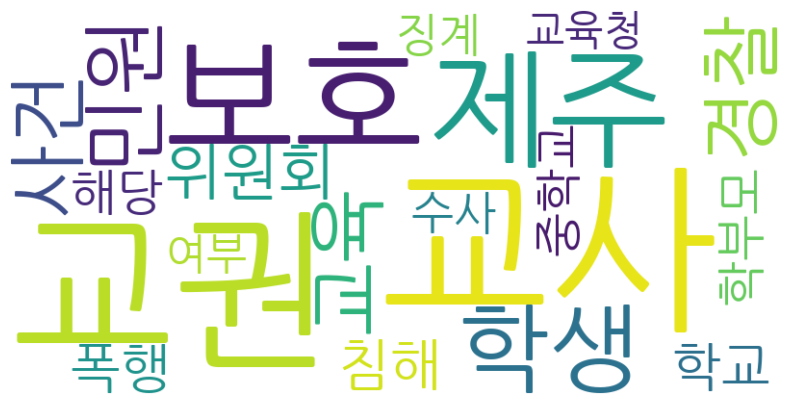

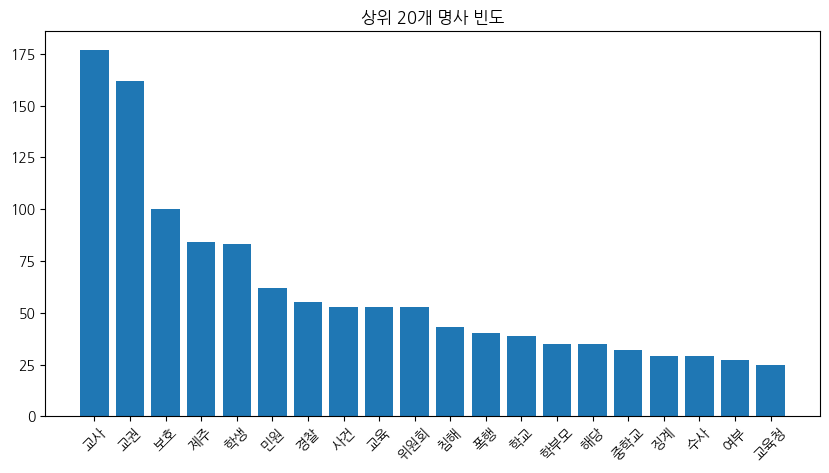

In [22]:
# 워드클라우드 시각화

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path='NanumGothic.ttf', width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(dict(top_nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

import matplotlib.pyplot as plt
# 막대그래프 시각화
labels, values = zip(*top_nouns)
plt.figure(figsize=(10, 5))
plt.bar(labels, values)
plt.xticks(rotation=45)
plt.title('상위 20개 명사 빈도')
plt.show()

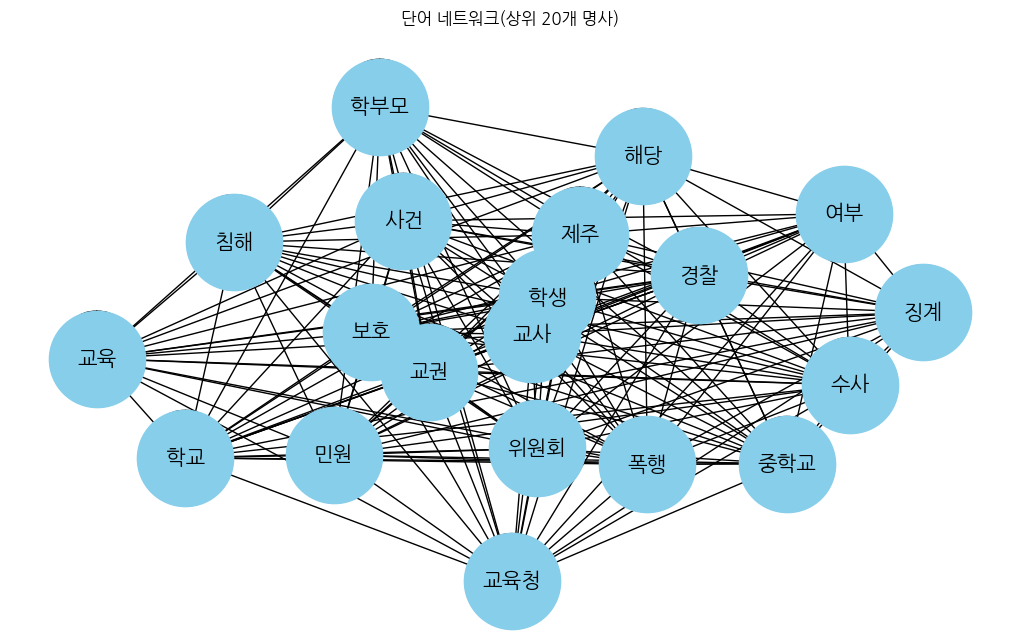

In [38]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter, defaultdict

# 1. 각 문서별 명사 리스트 만들기
doc_nouns = []
for idx, row in df.iterrows():
    title = row['제목']
    content = row['본문']
    nouns = []
    if isinstance(title, str):
        nouns += [n for n in tagger.tags([title]).nouns() if len(n) > 1]
    if isinstance(content, str):
        nouns += [n for n in tagger.tags([content]).nouns() if len(n) > 1]
    doc_nouns.append(nouns)

# 2. 상위 20개 명사만 사용
all_nouns = [n for nouns in doc_nouns for n in nouns]
top_nouns = set([n for n, _ in Counter(all_nouns).most_common(20)])

# 3. 동시 출현 카운트
co_occur = defaultdict(int)
for nouns in doc_nouns:
    filtered = [n for n in nouns if n in top_nouns]
    for i in range(len(filtered)):
        for j in range(i+1, len(filtered)):
            pair = tuple(sorted([filtered[i], filtered[j]]))
            co_occur[pair] += 1

# 4. 네트워크 생성 및 시각화
G = nx.Graph()
for (a, b), cnt in co_occur.items():
    if cnt >= 2:
        G.add_edge(a, b, weight=cnt)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=4800, node_color = 'skyblue', font_size=15, font_family='NanumGothic')
plt.title('단어 네트워크(상위 20개 명사)')
plt.show()